1. Jelenítsd meg egy vonaldiagramon a sinus függvény értékét az 1-20 tartományon!

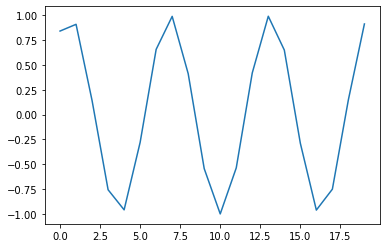

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 21)

# Kisebb lépésközzel szebb az eredmény
# x = np.arange(1, 20.1, 0.1)

plt.plot(np.sin(x))
plt.show()

2. Készíts egy 2x2 vonaldiagramból álló ábrát. Mindegyik x-tengelyen a számok 1-6-ig terjedjenek. Az értékek pedig rendre $x^2$, $x^3$, $x+2$ és $x+3$ legyenek. Minden alábrán más színű és megjelenésű vonal szerepeljen.

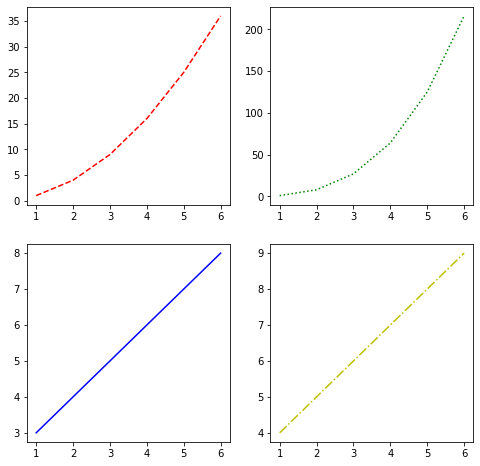

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 7)
y = [x**2,
     x**3,
     x + 2,
     x + 3]
fmt = ["r--", "g:", "b-", "y-."]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

c = 0
for i in range(2):
    for j in range(2):
        ax[i, j].plot(x, y[c], fmt[c])
        c += 1

plt.show()

3. Hozz létre egy öt elemű vektort 1-100 közé eső véletlen értékekkel. Jelenítsd meg az értékeket egy kördiagramon, és emeld ki a legnagyobb értékkel rendelkező szeletet. (A legnagyobb érték indexét legkönnyebben a `numpy.argmax` függvénnyel találhatod meg.) A címkék legyenek az értékek sorszámai.

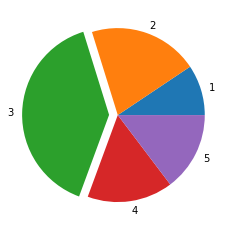

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 6)
y = np.random.randint(1, 101, size=len(x))
explode = np.zeros(len(y))
max_index = np.argmax(y)
explode[max_index] = 0.1

plt.pie(y, labels=x, explode=explode)
plt.show()

4. Jeleníts meg az előző feladatban szereplő kördiagramból kettőt (eltérő véletlen értékekkel) egymás mellett, alattuk pedig egy kétszer olyan széles alábrán egy oszlopdiagramot, amiben a két kör értékeinek összegei látszódjanak.

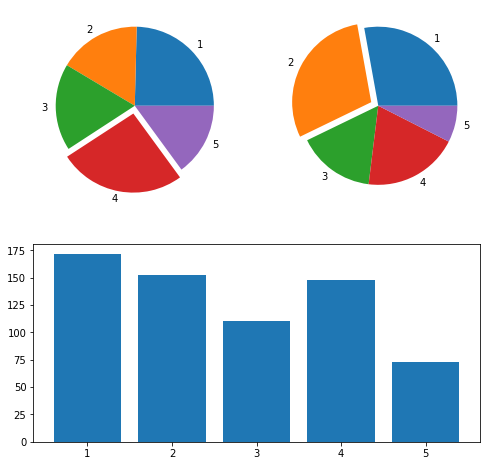

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def get_data(x):
    y = np.random.randint(1, 101, size=len(x))
    explode = np.zeros(len(y))
    max_index = np.argmax(y)
    explode[max_index] = 0.1
    return (y, explode)

x = np.arange(1, 6)
y1, ex1 = get_data(x)
y2, ex2 = get_data(x)

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(y1, labels=x, explode=ex1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.pie(y2, labels=x, explode=ex2)

ax34 = fig.add_subplot(2, 1, 2)
ax34.bar(x, y1 + y2)

plt.show()

5. Jelenítsd meg egymás alatt a $sin(x)$ és $cos(x)$ függvényeket, valamint ezek 4-szeres frekvenciájú változatukat a $[0, \pi]$ intervallumon 0.1-es lépésközzel. Így összesen 4 alábrád lesz ugyanazon az értelmezési tartományon. Ezért legyen a teljes ábrának egy közös X tengely felirata, és minden alábra Y tengelyén pedig a függvény neve jelenjen meg.

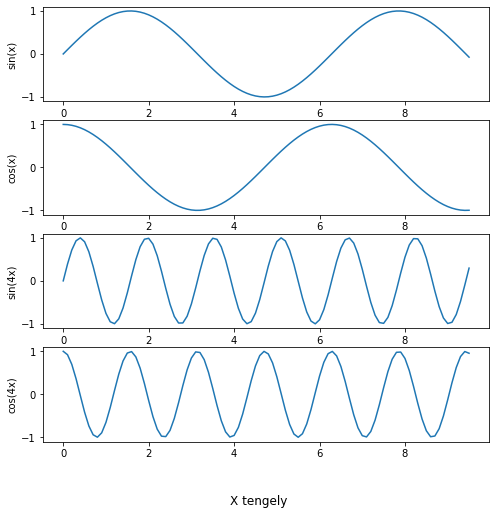

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, np.pi * 3 + 0.1, 0.1)
y = [np.sin(x),
     np.cos(x),
     np.sin(4 * x),
     np.cos(4 * x)]

fig, ax = plt.subplots(4, 1, figsize=(8, 8))

for i in range(4):
    ax[i].plot(x, y[i])
    
ax[0].set_ylabel("sin(x)")
ax[1].set_ylabel("cos(x)")
ax[2].set_ylabel("sin(4x)")
ax[3].set_ylabel("cos(4x)")
fig.supxlabel("X tengely")

plt.show()

6. Hozz létre egy függvényt, aminek a bemenete egy szám, és egy 5 elemű vektort ad eredményül, aminek az értékei 0 és a paraméter közti véletlen egész számok. A felhasználótól kérj be két egész számot (kezeld a hibákat), mindkét értékkel hívd meg a függvényt, és az eredményeket jelenítsd meg egy ábrán csoportosított oszlopdiagramként (5x2 oszlopnak kell látszódnia). Az oszlopok alapértelmezésben egybe esnek, ezért be kell állítani a diagram `width` tulajdonságát 0.5-nél kisebbre (pl.: 0.4), és az X tengely vektorát el kell tolni a `width` felével (az első diagramnál negatív, a másodiknál pozitív irányba).

Adjon meg egy számot: ezer
Nem számot adott meg!
Adjon meg egy számot: 1000
Adjon meg egy számot: 1200


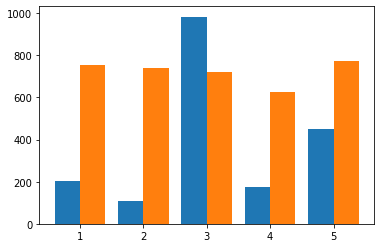

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 6)
w = 0.4

def get_random(n):
    return np.random.randint(n + 1, size=len(x))

def get_data():    
    while True:
        n = input("Adjon meg egy számot: ")        
        if n.isnumeric():
            n = int(n)
            return get_random(n)
        else:
            print("Nem számot adott meg!")
    
y1 = get_data()
y2 = get_data()

plt.bar(x-w/2, y1, width=w)
plt.bar(x+w/2, y2, width=w)
plt.show()

7.  A korábbi hisztogram példát bővítsd ki úgy, hogy jelenjen meg rajta egy piros színű, a [normális eloszlást](https://hu.wikipedia.org/wiki/Norm%C3%A1lis_eloszl%C3%A1s) reprezentáló vonal. Ehhez normalizáld a hisztogramot (`density=True`), hozz létre egy vektort -4 és 4 között 0.1-es lépésközzel (ez lesz az értelmezési tartomány), majd számold ki a normális eloszlás értékét erre a tartományra ($m=0$, $\sigma=1$). Az így kapott eloszlásnak nagyjából illeszkednie kell a hisztogramhoz.

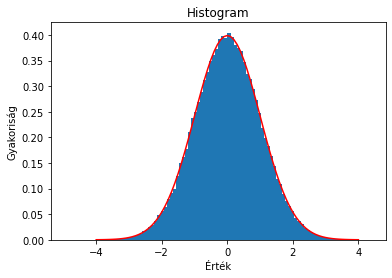

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_hist = np.random.randn(100_000)

m = 0
sigma = 1
x = np.arange(-4, 4.1, 0.1)

y_kitevo = -((x - m)**2) / (2 * sigma**2)
y_oszto = sigma * np.sqrt(2 * np.pi)
y = np.exp(y_kitevo) / y_oszto

plt.title("Histogram")
plt.xlabel("Érték")
plt.ylabel("Gyakoriság")

plt.hist(x_hist, 100, density=True)
plt.plot(x, y, "r")
plt.show()